# Let's Explore

### Acknowledgement
> The original dataset belongs to Kaggle: [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction) provided to redict house price using regression.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
cwd = os.getcwd()
for file in os.listdir(cwd):
    if file.endswith(".csv"):
        print (file) 

clean_data.csv
kc_house_data.csv


## Import and Summarize

In [3]:
data = pd.read_csv("clean_data.csv")

In [4]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,12.309982,3,1.00,1180,8.639411,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,8.639411,2014,10
1,13.195614,3,2.25,2570,8.887653,2.0,0,0,3,7,...,400,1951,1,98125,47.7210,-122.319,1690,8.941022,2014,12
2,12.100712,2,1.00,770,9.210340,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8.994917,2015,2
3,13.311329,4,3.00,1960,8.517193,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,8.517193,2014,12
4,13.142166,3,2.00,1680,8.997147,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,8.923058,2015,2


## Train-Test Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = data.loc[:, data.columns != 'price']
y = data['price']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Non-Linear Models

### Decision Tree Regression

In [12]:
from sklearn.tree import DecisionTreeRegressor
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=5)
regr_2 = DecisionTreeRegressor(max_depth=10)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

# Predict
y_pred_1 = regr_1.predict(X_test)
y_pred_2 = regr_2.predict(X_test)

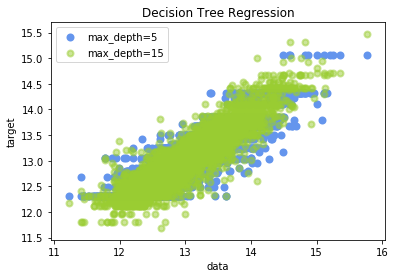

In [13]:
plt.figure()
#plt.scatter(X_train, y_train) #, s=20, edgecolor="black", c="darkorange", label="data")
plt.scatter(y_test, y_pred_1, color="cornflowerblue", label="max_depth=5", linewidth=2,)
plt.scatter(y_test, y_pred_2, color="yellowgreen", label="max_depth=15", linewidth=2, alpha=0.5)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend();

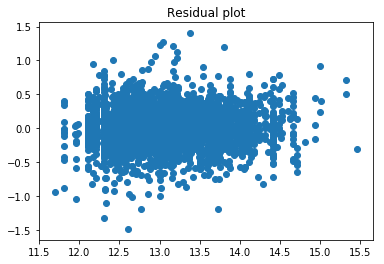

In [14]:
x_plot = plt.scatter(y_pred_2, (y_pred_2 - y_test))
plt.title('Residual plot');

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

scores_data=[]
for i in range (5,60, 10):
    regr= DecisionTreeRegressor(max_depth=i)
    scores = cross_val_score(regr, X, y, cv=5).max()
    scores_data += [scores]

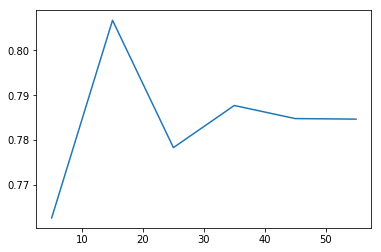

In [16]:
plt.plot(range (5,60,10), scores_data);

Mean squared error: 0.06
Variance score: 0.77


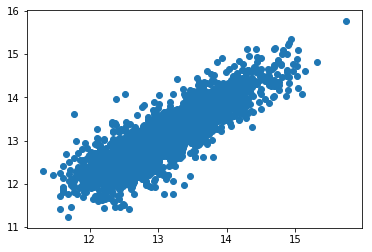

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

# Fit regression model
regr = DecisionTreeRegressor(max_depth=35)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
#
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
plt.scatter(y_pred, y_test);

### Random Forest

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(max_depth=50, random_state=0)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [19]:
pd.DataFrame({'importance': regr.feature_importances_, 'feature': X_train.columns}).sort_values(by='importance', ascending=False)

,feature,importance
8,grade,0.342694
14,lat,0.295890
2,sqft_living,0.173427
15,long,0.044347
16,sqft_living15,0.024348
11,yr_built,0.023060
9,sqft_above,0.015400
3,sqft_lot,0.014832
17,sqft_lot15,0.013799
13,zipcode,0.011146


In [20]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 0.04
Variance score: 0.87


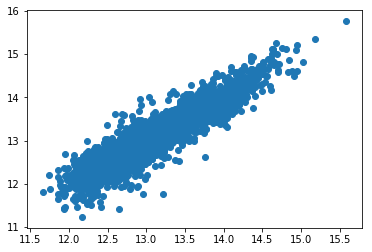

In [21]:
plt.scatter(y_pred, y_test);

## Linear Regression

In [22]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

C:\Users\Ali\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [23]:
regm = sm.OLS(endog=y_train, exog=X_train)
results = regm.fit()

In [24]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.129e+06
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        11:46:10   Log-Likelihood:                -638.24
No. Observations:               15128   AIC:                             1314.
Df Residuals:                   15109   BIC:                             1459.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms         -0.0169      0.003     -5.756      0.000      -0.023      -0.011
bathrooms         0.0671      0.005     13.830      0.000       0.058       0.077
sqft_living    9.939e-05   3.47e-06     28.675      0.000    9.26e-05       0.000
sqft_lot          0.0160      0.006      2.659      0.008       0.004       0.028
floors            0.0556      0.006      9.537      0.000       0.044       0.067
waterfront        0.3815      0.027     14.381      0.000       0.330       0.434
view              0.0636      0.003     19.525      0.000       0.057       0.070
condition         0.0644      0.004     18.168      0.000       0.057       0.071
grade             0.1573      0.003     48.661      0.000       0.151       0.164
sqft_above     5.032e-05   3.51e-06     14.345      0.000    4.34e-05    5.72e-05
sqft_basement  4.907e-05   3.96e-06     12.398      0.000    4.13e-05    5.68e-05
yr_built         -0.0035      0.000    -32.264      0.000      -0.004      -0.003
yr_renovated      0.0847      0.011      7.785      0.000       0.063       0.106
zipcode          -0.0008   4.81e-05    -17.275      0.000      -0.001      -0.001
lat               1.3905      0.016     85.885      0.000       1.359       1.422
long             -0.1026      0.020     -5.129      0.000      -0.142      -0.063
sqft_living15     0.0001   5.21e-06     19.962      0.000    9.38e-05       0.000
sqft_lot15       -0.0493      0.007     -7.579      0.000      -0.062      -0.037
year              0.0104      0.002      4.895      0.000       0.006       0.015
month            -0.0041      0.001     -5.886      0.000      -0.006      -0.003
==============================================================================
Omnibus:                      293.239   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.091
Skew:                           0.010   Prob(JB):                    4.09e-137
Kurtosis:                       3.998   Cond. No.                     5.49e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.83e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [25]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  bedrooms        -0.016858
bathrooms        0.067130
sqft_living      0.000099
sqft_lot         0.015988
floors           0.055609
waterfront       0.381523
view             0.063567
condition        0.064422
grade            0.157256
sqft_above       0.000050
sqft_basement    0.000049
yr_built        -0.003516
yr_renovated     0.084686
zipcode         -0.000830
lat              1.390544
long            -0.102633
sqft_living15    0.000104
sqft_lot15      -0.049293
year             0.010389
month           -0.004145
dtype: float64
R2:  0.999626702399


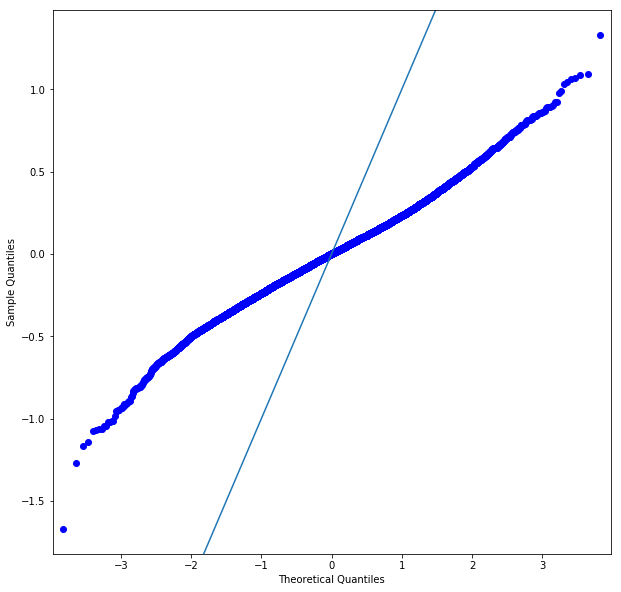

In [36]:
fig, ax = plt.subplots(figsize=(10,10))
fig = sm.graphics.qqplot(results.resid, ax=ax)
fig = sm.graphics.abline_plot(0,1, ax=ax)

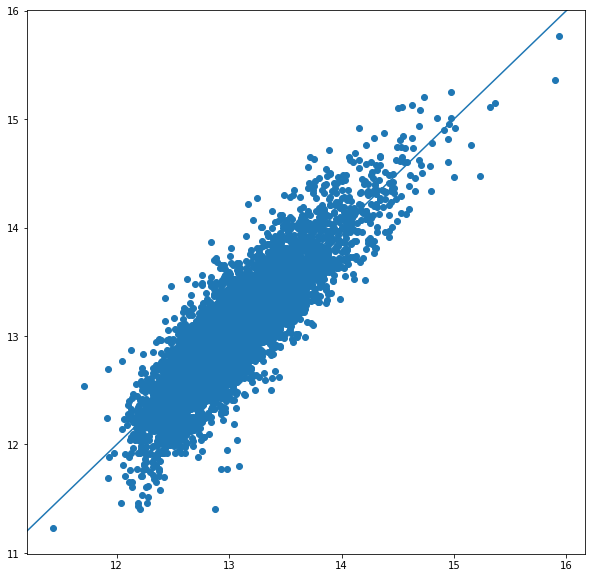

In [40]:
y_pred = results.predict(exog=X_test)
fig, ax = plt.subplots(figsize=(10,10))
fig = plt.scatter(y_pred, y_test)
fig = sm.graphics.abline_plot(0,1, ax=ax);

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 0.06
Variance score: 0.78


###  Fin!